In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score
import sklearn

from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
import xgboost as xgb

from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

from sklearn.cluster import KMeans
from sklearn import preprocessing
import pylab as pl


import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff


In [6]:
data = pd.read_csv("bank.csv")
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
# get rid of the index column 
del data['Unnamed: 0']
data.head()
data_cp = data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


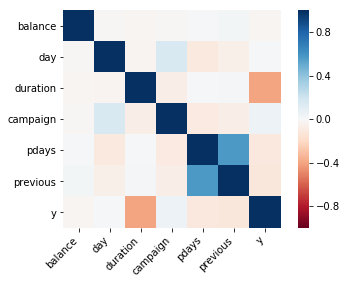

In [65]:
temp =data.copy(deep=True)
temp['y']= [1 if i=='no' else 0 for i in temp.y]
corr = temp.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='RdBu',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [72]:
#temp1 = temp.loc[temp['duration']==0]
a = temp['duration']
a.describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

# Data Description
## Input variables:
### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance(numeric)
### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone') 

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day: last contact day of the month (numeric)

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


## Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# EDA

# Perform summary analysis on each variables and plot distribution 

<Figure size 432x288 with 0 Axes>

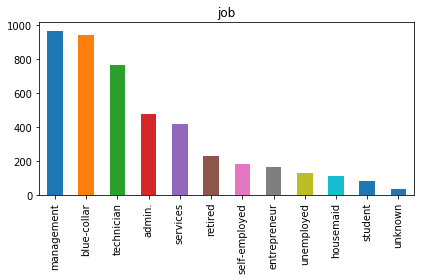

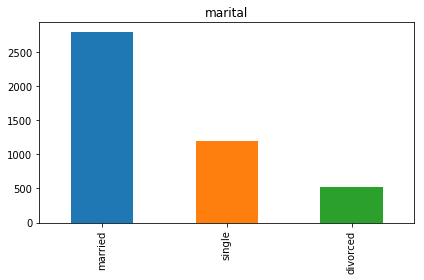

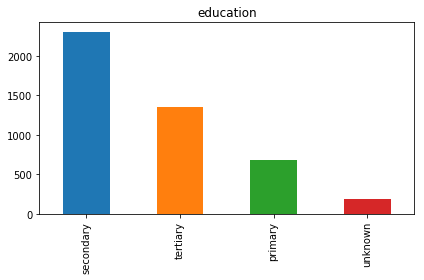

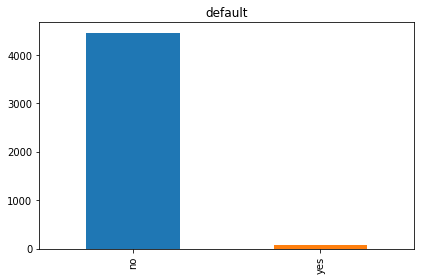

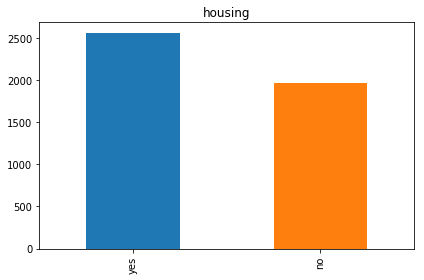

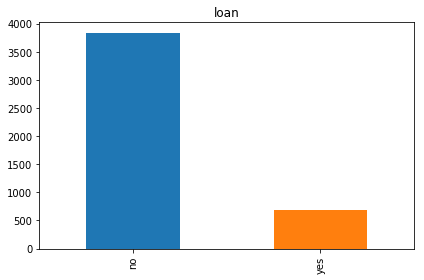

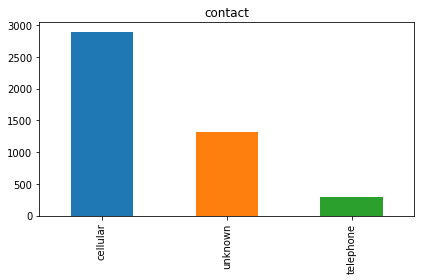

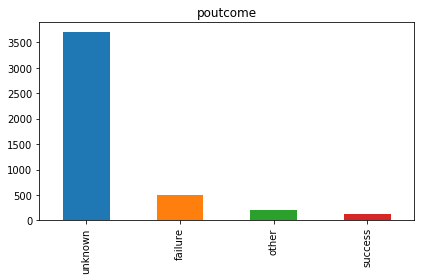

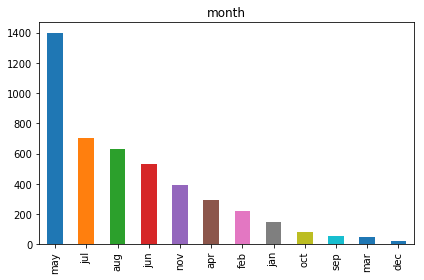

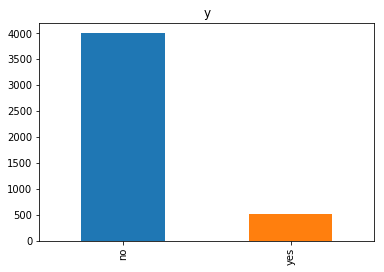

In [4]:
# Categorical variables: job, marital, eduction, default, housing, loan, contact, poutcome

for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome','month','y']:
    j = 1
    plt.tight_layout()
    plt.figure()
    plt.title(i)
    data[i].value_counts().plot(kind='bar')
    j = j+1



In [5]:
# summary statistics for age, balance, day, duration, campaign, pdays, previous 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


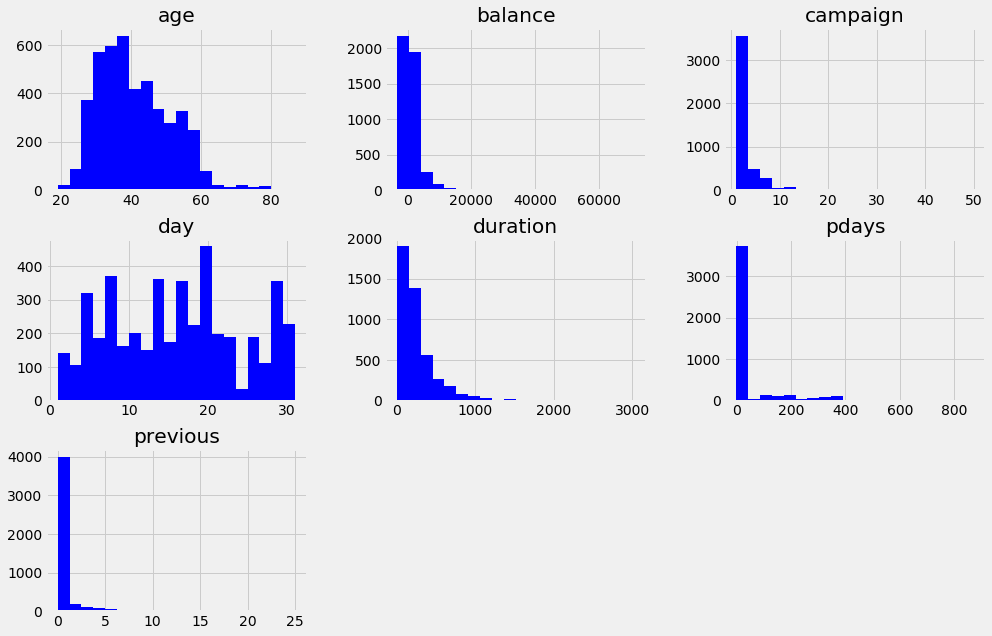

In [6]:
plt.style.use('fivethirtyeight')
data.hist(bins=20, figsize=(15,10), color='blue')
plt.show()

In [7]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


In [8]:
# break down of target variable 
data['y'].value_counts()/data['y'].count()
len(data)

4521

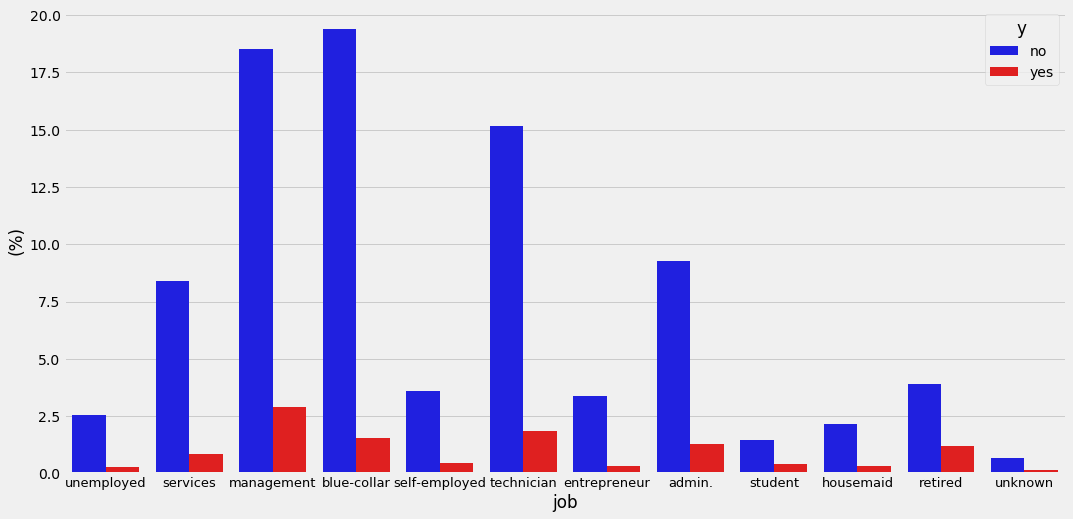

In [9]:
f, ax = plt.subplots(1,1, figsize=(16,8))
palette = ["blue", "red"]

sns.barplot(x="job", y="balance", hue="y", data=data, palette=palette, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="(%)")
ax.set_xticklabels(data["job"].unique(), rotation=0, rotation_mode="anchor", fontsize=13)
plt.show()

In [10]:
def plot_discrete(df, variable, hue_choice, palette_choice=None):
    """Function to plot the distribution of a specified variable by class.
    
    Args:
        df (DataFrame): A DataFrame with values to plot.
        variable (str): Variable of interest.
        hue_choice (str): Variable which splits data into classes.
        palette_choice (str, optional): Color on bins. Defaults to None.
        
    """
    sns.countplot(df[variable], palette=palette_choice, hue=df[hue_choice])
    plt.title('Buying Decision by %s' % variable)

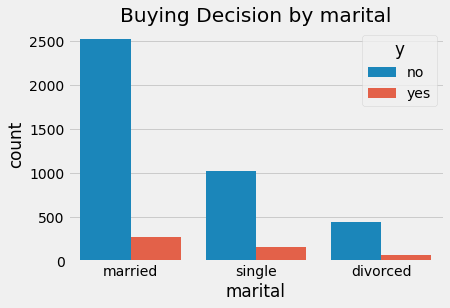

In [11]:
plot_discrete(data,'marital','y')

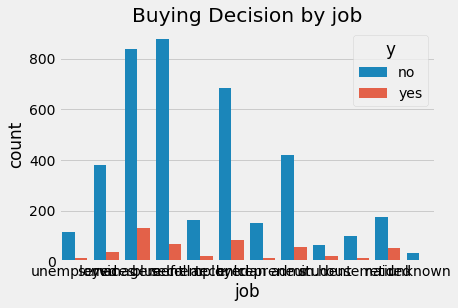

In [12]:
plot_discrete(data,'job','y')

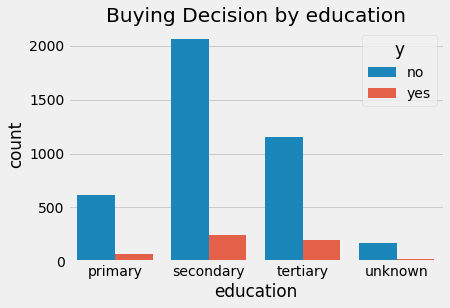

In [13]:
plot_discrete(data,'education','y')

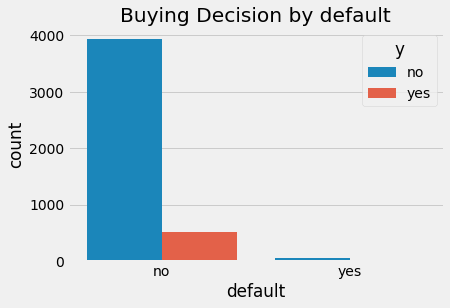

In [14]:
plot_discrete(data,'default','y')

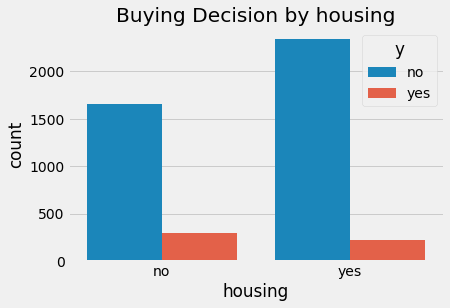

In [15]:
plot_discrete(data,'housing','y')

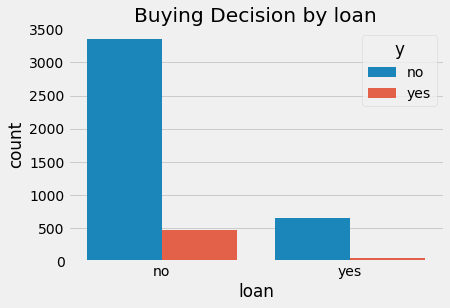

In [16]:
plot_discrete(data,'loan','y')

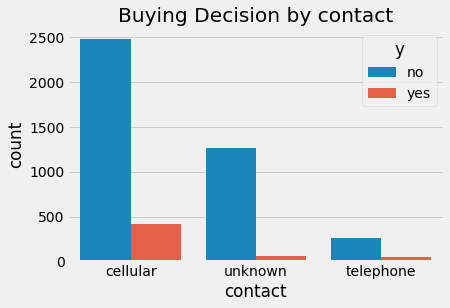

In [17]:
plot_discrete(data,'contact','y')

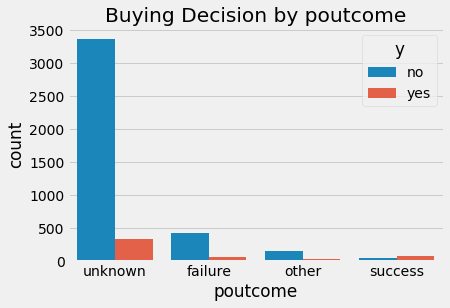

In [18]:
plot_discrete(data,'poutcome','y')

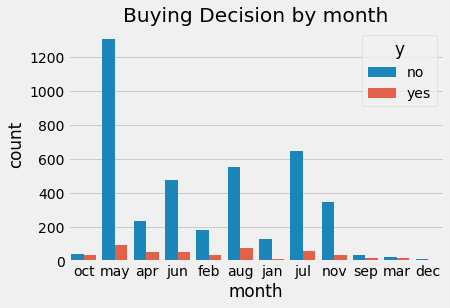

In [19]:
plot_discrete(data,'month','y')

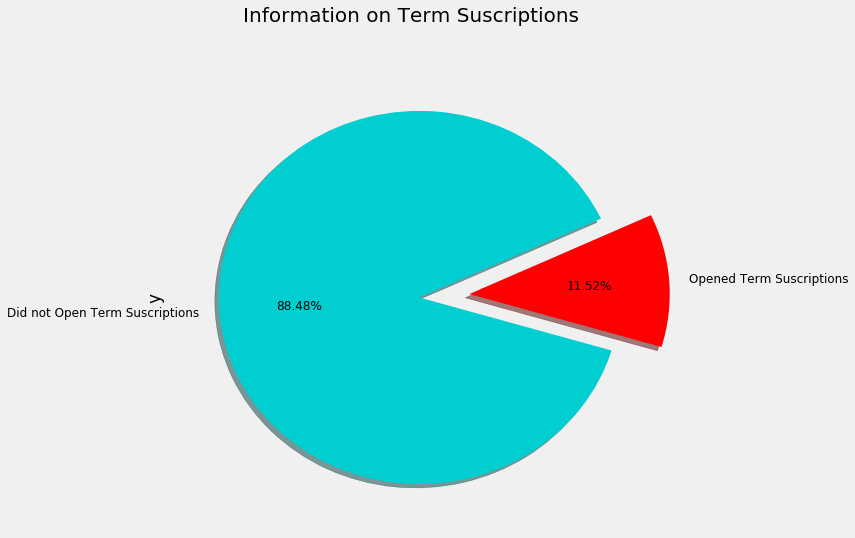

In [20]:
f, ax = plt.subplots(1,1, figsize=(8,8))


colors = ["darkturquoise", "red"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

data["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)


In [21]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = data.loc[data["y"] == 'yes']

occupations = data["job"].unique().tolist()

# Get the ages by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
plot(fig)

'file:///Users/xulinxin/Desktop/MSiA 423 Value Chain/Project/temp-plot.html'

# Reduce the number of classes for month of contact

In [8]:
# By inspecting the bar chart, we decide to reduce month to only 3 classes
# High Season - Period with high contact number: May to Aug
# Medium Season - Period with medium contact number: Feb, Apr, Nov
# Low Season - Period with low contact number: Jan, Mar, Sept, Oct, Dec

data1 = data
j = 0
for i in data1['month']:
    if (i in ('may','jun','jul','aug')):
        data1.iloc[j,10] = 'high'
    elif (i in ('feb','apr','nov')):
        data1.iloc[j,10] = 'medium'
    else:
        data1.iloc[j,10] = 'low'
    j = j+1

In [23]:
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,low,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,high,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,medium,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,high,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,high,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,medium,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,high,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,high,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,high,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,medium,313,1,147,2,failure,no


# Convert age to categorical variables for convenience 


In [9]:
data2 = data1
c1 = data2['age'].quantile(1/3)
c2 = data2['age'].quantile(2/3)

j = 0
for i in data2['age']:
    if (i < c1):
        data2.iloc[j,0] = 'low'
    elif (c1 <=i<=c2 ):
        data2.iloc[j,0] = 'medium'
    else:
        data2.iloc[j,0] = 'high'
    j = j+1

# Detect the existence of any high correlation between parameters

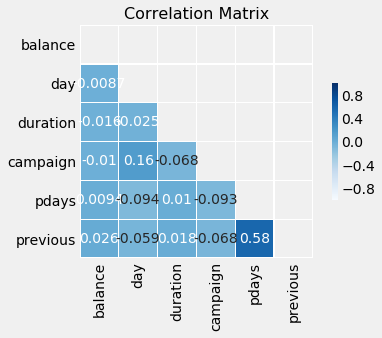

In [25]:
# only for numerical data
numeric_df = data2.select_dtypes(exclude="object")

corr_numeric = numeric_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_numeric, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_numeric, mask=mask, cmap="Blues", center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix", fontsize=16)
plt.show()

# no need for removing any highly correlated variables

# XGBoost Model

In [26]:
#Remove duration for prediction purpose 
del data2['duration']

In [27]:
list(data2.iloc[:,0:15])

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [10]:
#One hot encoding
one_hot_encoded_X = pd.get_dummies(data2.iloc[:,0:15])

X_data = one_hot_encoded_X.copy()
y = data2.y


#Split the dataset into train and Test
seed = 10
test_size = 0.3
X_trian, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)
y_train = [1 if (x=='yes') else 0 for x in y_train]
y_test = [1 if (x=='yes') else 0 for x in y_test]




/Users/xulinxin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



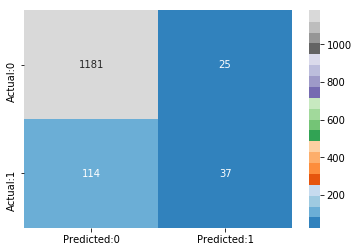

In [11]:
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(silent=False, scale_pos_weight=1, learning_rate=0.01, colsample_bytree = 0.4,
                      subsample = 0.8,objective='binary:logistic', n_estimators=1000, 
                      reg_alpha = 0.3, max_depth=4, gamma=10)
train_model = model.fit(X_trian, y_train)

#prediction and Classification Report

y_pred = train_model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="tab20c")


In [31]:
set(data.contact)

{'cellular', 'telephone', 'unknown'}

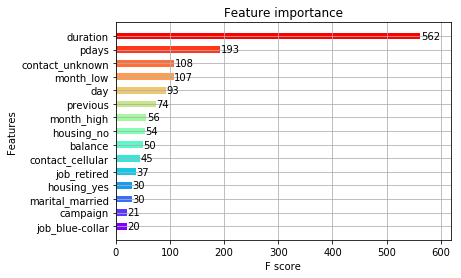

In [29]:
## varaiable importance plot
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 15))
xgb.plot_importance(model, max_num_features=15, height =0.5,linewidth =100, color=colors) 
plt.show()

In [33]:
# Machine learning performance metric
sklearn.metrics.accuracy_score(y_test,y_pred)

print("Accuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))


Accuracy score : 89.904200
Recall score : 13.907285


## XGBoost

In [34]:
# Parameters Tuning 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [35]:
data2.head(1)
X_data.shape
data3= data2.iloc[:,:15]
data3.head()
X_trian.shape
data3.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,low,unemployed,married,primary,no,1787,no,no,cellular,19,low,1,-1,0,unknown


In [36]:
X_data.head()
data3= data2.iloc[:,:15]
value = ['low','unemployed','married', 'primary','no', 1787,'no','no','cellular', 19,'low', 1,-1,0,'unknown']
row_no = data3.shape[0]
data3.loc[row_no]= value 
a=  pd.get_dummies(data3)
a.tail(1)

,balance,day,campaign,pdays,previous,age_high,age_low,age_medium,job_admin.,job_blue-collar,...,contact_cellular,contact_telephone,contact_unknown,month_high,month_low,month_medium,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4521,1787,19,1,-1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [37]:
n_estimators = [50, 100, 200,300]
learning_rate = [0.001, 0.01, 0.05, 0.1]
max_depth = [3, 4, 5, 6]

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

y_train = [1 if (x=='yes') else 0 for x in y_train]
y_test = [1 if (x=='yes') else 0 for x in y_test]



xgb_model = xgb.XGBClassifier()
    
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)

# run grid search with different combinations of parameters
clf = GridSearchCV(xgb_model, param_grid, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=0, refit=True)

clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [38]:
clf


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1], 'n_estimators': [50, 100, 200], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [49]:
a = 2
if a==10:
    print('a')
elif a==2:
    print('b')

b



Accuracy score : 89.388357
ROC score : 84.810000


/Users/xulinxin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



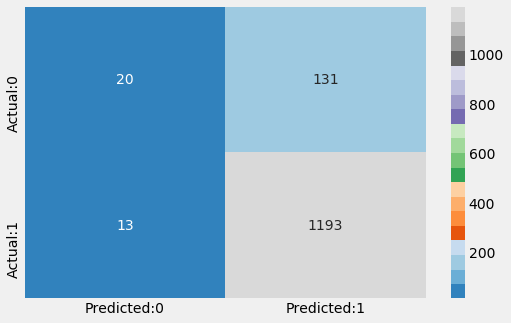

In [39]:
# Performance metrics
y_pred= clf.best_estimator_.predict(X_test)
#y_pred = [1 if (x=='yes') else 0 for x in y_pred]

cm_2=confusion_matrix(y_test,y_pred,[1,0])

conf_matrix=pd.DataFrame(data=cm_2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="tab20c")

print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))
roc_xgboost = round(clf.score(X_train, y_train) * 100, 2)
print("ROC score : %f" %(roc_xgboost))


## Logistic Model


Accuracy score : 89.609433
ROC score : 70.763182

f1 score : 22.950820


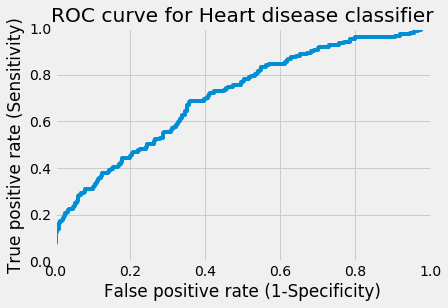

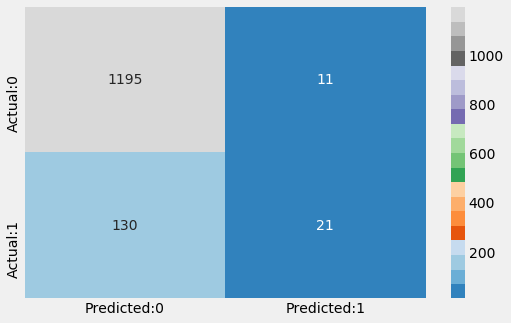

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

y_train = [1 if (x=='yes') else 0 for x in y_train]
y_test = [1 if (x=='yes') else 0 for x in y_test]

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred_prob_yes=logreg.predict_proba(X_test)

sklearn.metrics.accuracy_score(y_test,y_pred)



print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred_prob_yes[:,1]) * 100))
print("f1 score : %f" %(f1_score(y_pred, y_test) * 100))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="tab20c")

# Decision Tree 

In [41]:
clf_tree=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

y_train = [1 if (x=='yes') else 0 for x in y_train]
y_test = [1 if (x=='yes') else 0 for x in y_test]
# clf_tree.fit(X_train,y_train)

# y_pred = clf_tree.predict(X_test)
# #y_pred = [1 if (x=='yes') else 0 for x in y_pred]


# print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))
# print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
# print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))

# cm_2=confusion_matrix(y_test,y_pred,[1,0])

# conf_matrix=pd.DataFrame(data=cm_2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="tab20c")

Best Hyper Parameters: {'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 14, 'random_state': 123}

Accuracy score : 88.282977
ROC score : 85.770000



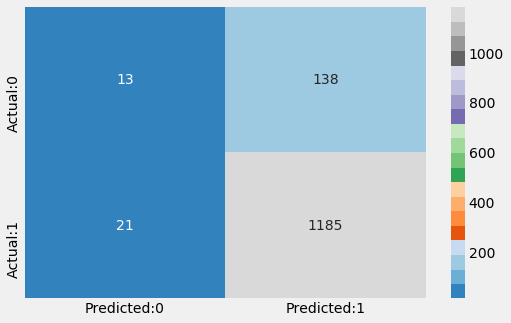

In [42]:
clf_tree=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

y_train = [1 if (x=='yes') else 0 for x in y_train]
y_test = [1 if (x=='yes') else 0 for x in y_test]
# Parameters Tuning 

#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

#Making models with hyper parameters sets
CV_clf = GridSearchCV(clf_tree, param_grid=params, n_jobs=-1, cv=5, scoring = 'roc_auc')

#Learning
CV_clf.fit(X_train,y_train)

#The best hyper parameters set
print("Best Hyper Parameters:",CV_clf.best_params_)

#Prediction
y_pred= CV_clf.best_estimator_.predict(X_test)

cm_2=confusion_matrix(y_test,y_pred,[1,0])

conf_matrix=pd.DataFrame(data=cm_2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="tab20c")

print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(round(CV_clf.score(X_train, y_train) * 100, 2)))




## Random Forest

In [43]:
## Grid Search Tuning 
random_forest = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)

y_train = [1 if (x=='yes') else 0 for x in y_train]


# grid search tuning 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='roc_auc')
CV_rfc.fit(X_train, y_train)
y_test = [1 if (x=='yes') else 0 for x in y_test]

# Performance metrics
y_pred= CV_rfc.best_estimator_.predict(X_test)




Accuracy score : 89.683125
ROC score : 74.640000

f1 score : 22.222222


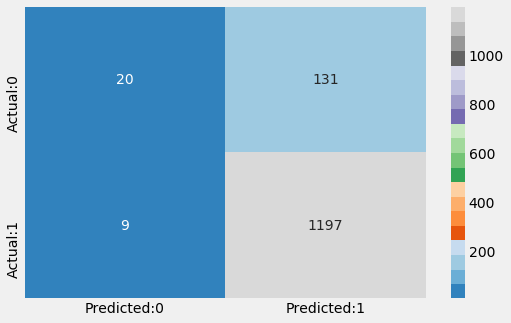

In [44]:

CV_rfc.score(X_train, y_train)
acc_random_forest = round(CV_rfc.score(X_train, y_train) * 100, 2)
acc_random_forest

cm_2=confusion_matrix(y_test,y_pred,[1,0])

conf_matrix=pd.DataFrame(data=cm_2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="tab20c")

print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(round(CV_rfc.score(X_test, y_test) * 100, 2)))

print("f1 score : %f" %(f1_score(y_pred, y_test) * 100))



## Clustering 

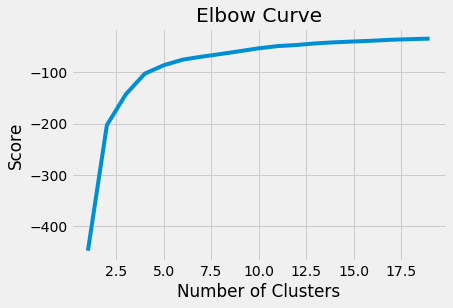

/Users/xulinxin/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:621: UserWarning:

Your filename `basic-bar-cluster` didn't end with .html. Adding .html to the end of your file.



'file:///Users/xulinxin/Desktop/MSiA 423 Value Chain/Project/basic-bar-cluster.html'

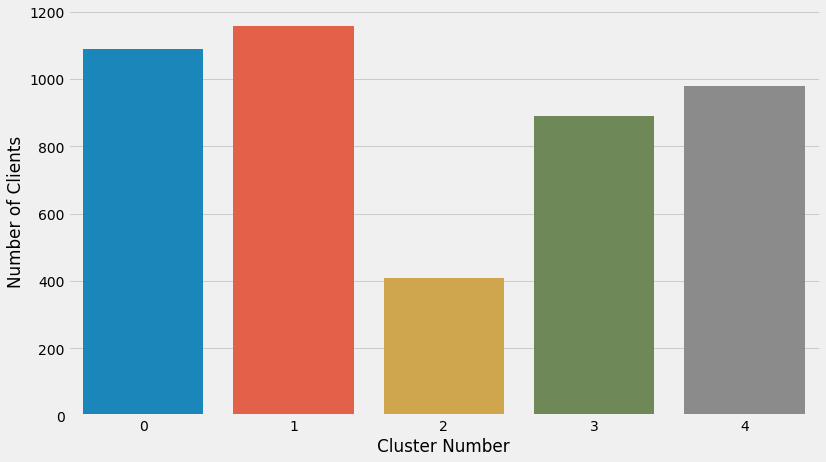

In [45]:
# only keep numeric varaibles for clustering 
numeric_df = data2.select_dtypes(exclude="object")

# Check if rows contain any null values
numeric_df.isnull().sum()

# Normalize the data with MinMax scaling provided by sklearn
minmax_processed = preprocessing.MinMaxScaler().fit_transform(numeric_df)
df_numeric_scaled = pd.DataFrame(minmax_processed, index=numeric_df.index, columns=numeric_df.columns[0:5])
df_numeric_scaled.head()

# choose k 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

# These score values signify how far our observations are from the cluster center. We want to keep this 
# score value around 0. A large positive or a large negative value would indicate that the cluster 
# center is far from the observations.
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

# Based on these scores value, we plot an Elbow curve to decide which cluster size is optimal. Note that we are 
# dealing with tradeoff between cluster size(hence the computation required) and the relative accuracy
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()


# Our Elbow point is around cluster size of 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

# Let's put these labels back into the original numeric data frame.
df_numeric_scaled['cluster'] = kmeans.labels_
numeric_df['cluster'] = kmeans.labels_


# visualization 
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=numeric_df.groupby(['cluster']).count()['pdays'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Clients")

vals = numeric_df.groupby(['cluster']).count()['pdays'].values
labels = np.arange(0,5,1)

data = [go.Bar(x=labels,y=vals,marker=dict(color="#FE9A2E"))]

layout = go.Layout(
    title="Cluster Analysis",
)

fig = go.Figure(data=data, layout=layout)

plot(fig, filename='basic-bar-cluster')


In [46]:
# cluster statistics
cluster_stats = numeric_df.drop(['y'],axis =1).groupby(['cluster']).mean()
cluster_stats.transpose()

KeyError: "labels ['y'] not contained in axis"

# Compare clusters according to features used in segmentation 

In [ ]:
# add a column for number of clients' who subscribe the term deposit
numeric_df.groupby(['cluster'])['y'].sum()
cluster_stats['subscription count'] = numeric_df.groupby(['cluster'])['y'].sum()
cluster_stats['subscription rate'] = numeric_df.groupby(['cluster'])['y'].sum()/numeric_df.groupby(['cluster']).count()['pdays'].values
cluster_stats.transpose()

## Cluster 0: 
    - clients are contacted in the beginning of the month on average, and their  rate of subscription is the highest
## Cluster 1: wealthy clients
    - clients with highest amount of balance, and they are contact in the mid of the month for this campaign on average. They have medium to 
    high number of contacts in this campign, and half a month is past since their last contact. Though they have affordability to subscribe to 
    the financial product, the number of subscription is low but the rate of subscription is high
## Cluster 2: most frequently contacted clients
    - clients with least balance but highest number of contact for this campaign. They are contacted at the end of the month, maybe the 
    bank think that they are interested in making money, so if they have money left at the end of the month, they would have high possibility 
    in subscribe the term deposit. Though they do not have high balance, they are 2nd most group who subscribe to the term deposit 
## Cluster 3: new clients
    - clients has least number of contacts for campaigns before (just 3 days ago maybe because they are new users), and appears to be 
    contacted few days ago. Maybe they are new clients so that bank put effort in advertising their product so we see a more intense/dense
    contact. They have highest subscription rate 
## Cluster 4: loyal clients
    - clients with high balance (might be an indicator for affordability for term deposit), very frequently being contacted 
    during previous campaigns, but has not been contacted for the longest time (almost a year) since last campaign. The number of contact for thiis 
    contact is the least among those. However, the number of clients' subsciption is the highest

